In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. Removing more columns to try and optimize the model
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['NAME'])
application_df.head()

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
value_counts_classification = application_df.CLASSIFICATION.value_counts()
replace_class = list(value_counts_classification[value_counts_classification < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Look at ask_amt value counts for binning
value_counts_askamount = application_df.ASK_AMT.value_counts()
value_counts_askamount

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

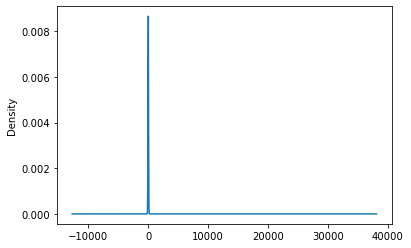

In [6]:
value_counts_askamount.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(value_counts_askamount[value_counts_askamount<5].index)

# Replace in dataframe
for app in replace_application:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(app,5001)
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()


5000    25398
5001     8901
Name: ASK_AMT, dtype: int64

In [8]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [9]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
input_layer_test = len(X_train_scaled[0])
input_layer_test

52

In [14]:
input_layer = 52
hidden_layer1 = 25
hidden_layer2 = 8
hidden_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, input_dim=input_layer, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2, input_dim=input_layer, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer3, input_dim=input_layer, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1325      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 208       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 1,564
Trainable params: 1,564
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt3/",exist_ok=True)
checkpoint_path = "checkpoints_opt3/weights.{epoch:02d}.hdf5"

In [17]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [18]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
 68/804 [=>............................] - ETA: 1s - loss: 0.6859 - accuracy: 0.5331
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
195/804 [======>.......................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6093
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
275/804 [=========>....................] - ETA: 0s - loss: 0.6529 - accuracy: 0.6423
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
392/804 [=============>................] - ETA: 0s - loss: 0.6341 - accuracy: 0.6712
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.6270 - accuracy: 0.6797
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.6190 - accuracy: 0.6892
Epoch 00001: saving model to checkpoints_opt3\weights.01.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6144 - accuracy: 0.6936
Epoch 00001: saving mo

447/804 [===============>..............] - ETA: 0s - loss: 0.5478 - accuracy: 0.7355
Epoch 00007: saving model to checkpoints_opt3\weights.07.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5491 - accuracy: 0.7350
Epoch 00007: saving model to checkpoints_opt3\weights.07.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5501 - accuracy: 0.7339
Epoch 00007: saving model to checkpoints_opt3\weights.07.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5502 - accuracy: 0.7325
Epoch 00007: saving model to checkpoints_opt3\weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7340
Epoch 8/50
 40/804 [>.............................] - ETA: 0s - loss: 0.5193 - accuracy: 0.7680
Epoch 00008: saving model to checkpoints_opt3\weights.08.hdf5
164/804 [=====>........................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7441
Epoch 00008: saving model to checkpoints_opt3\weights.08.hdf5
247/804 [========>

804/804 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7363
Epoch 14/50
 44/804 [>.............................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7436
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
129/804 [===>..........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7406
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7427
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 0.5454 - accuracy: 0.7364
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5439 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7368
Epoch 00014: saving model to checkpoints_opt3\weights.14.hdf5
644/804 [========

318/804 [==========>...................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7366
Epoch 00020: saving model to checkpoints_opt3\weights.20.hdf5
395/804 [=============>................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7373
Epoch 00020: saving model to checkpoints_opt3\weights.20.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7385
Epoch 00020: saving model to checkpoints_opt3\weights.20.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7389
Epoch 00020: saving model to checkpoints_opt3\weights.20.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5405 - accuracy: 0.7388
Epoch 00020: saving model to checkpoints_opt3\weights.20.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7385
Epoch 21/50
  1/804 [..............................] - ETA: 1s - loss: 0.4404 - accuracy: 0.8750
Epoch 00021: saving model to checkpoints_opt3\weights.21.hdf5
115/804 [===>....

695/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7389
Epoch 00026: saving model to checkpoints_opt3\weights.26.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7401
Epoch 00026: saving model to checkpoints_opt3\weights.26.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7397
Epoch 27/50
 86/804 [==>...........................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7475
Epoch 00027: saving model to checkpoints_opt3\weights.27.hdf5
160/804 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.7391
Epoch 00027: saving model to checkpoints_opt3\weights.27.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7385
Epoch 00027: saving model to checkpoints_opt3\weights.27.hdf5
380/804 [=============>................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7418
Epoch 00027: saving model to checkpoints_opt3\weights.27.hdf5
491/804 [========

158/804 [====>.........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7395
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
236/804 [=======>......................] - ETA: 0s - loss: 0.5377 - accuracy: 0.7417
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
463/804 [================>.............] - ETA: 0s - loss: 0.5360 - accuracy: 0.7401
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5337 - accuracy: 0.7420
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5343 - accuracy: 0.7416
Epoch 00033: saving model to checkpoints_opt3\weights.33.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7424
Epoch 00033: saving model to chec

545/804 [===================>..........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7397
Epoch 00039: saving model to checkpoints_opt3\weights.39.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5325 - accuracy: 0.7425
Epoch 00039: saving model to checkpoints_opt3\weights.39.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5334 - accuracy: 0.7420
Epoch 00039: saving model to checkpoints_opt3\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7404
Epoch 40/50
 42/804 [>.............................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7299
Epoch 00040: saving model to checkpoints_opt3\weights.40.hdf5
112/804 [===>..........................] - ETA: 0s - loss: 0.5429 - accuracy: 0.7335
Epoch 00040: saving model to checkpoints_opt3\weights.40.hdf5
224/804 [=======>......................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints_opt3\weights.40.hdf5
344/804 [========

  1/804 [..............................] - ETA: 1s - loss: 0.5526 - accuracy: 0.7500
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
111/804 [===>..........................] - ETA: 0s - loss: 0.5358 - accuracy: 0.7376
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
219/804 [=======>......................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7390
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
294/804 [=========>....................] - ETA: 0s - loss: 0.5349 - accuracy: 0.7387
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7415
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7430
Epoch 00046: saving model to checkpoints_opt3\weights.46.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7432
Epoch 00046: saving model to chec

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5496 - accuracy: 0.7268
Loss: 0.5496228933334351, Accuracy: 0.7267638444900513
